In [41]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Katib output

In [57]:
pfn_katib_string = StringIO("""
    Trial name,Status,Loss,Avg loss,Mse,Avg mse,Mae,Avg mae,Num edge conv blocks,K,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,Optimizer,Num epochs,Batch size,Data fraction
    jec-katib-pfn-regressor-open-de181d-2r76bmtw,Succeeded,7.39258e-2,8.92596e-2,1.01733e-2,1.76998e-2,7.39258e-2,8.99832e-2,1,1,2,100,1,200,0.32766,5.52255e-4,adam,50,500,1
    jec-katib-pfn-regressor-open-de181d-2wgk282f,Succeeded,7.31608e-2,8.90562e-2,1.00642e-2,1.76033e-2,7.31608e-2,8.9775e-2,1,1,3,100,1,50,0.24362,8.60102e-4,ranger,50,500,1
    jec-katib-pfn-regressor-open-de181d-42zw9zq7,Succeeded,7.74913e-2,9.15936e-2,1.11584e-2,1.85281e-2,7.74913e-2,9.23108e-2,1,1,1,200,3,200,0.19136,4.47107e-3,rmsprop,50,500,1
    jec-katib-pfn-regressor-open-de181d-4hbwjwr4,Succeeded,7.75319e-2,9.15901e-2,1.11799e-2,1.85283e-2,7.75319e-2,9.23072e-2,1,1,1,400,4,100,0.4477,8.24164e-3,rmsprop,50,500,1
    jec-katib-pfn-regressor-open-de181d-6dqglxrn,Succeeded,7.41172e-2,8.97198e-2,1.03002e-2,1.79516e-2,7.41172e-2,9.04444e-2,1,1,3,50,1,400,0.49255,5.52741e-3,adagrad,50,500,1
    jec-katib-pfn-regressor-open-de181d-6lflsjrp,Succeeded,7.3721e-2,8.98642e-2,1.01323e-2,1.79665e-2,7.3721e-2,9.05891e-2,1,1,4,50,4,50,2.10846e-2,9.23666e-3,adam,50,500,1
    jec-katib-pfn-regressor-open-de181d-855dglvz,Succeeded,7.75021e-2,9.15922e-2,1.11643e-2,1.85281e-2,7.75021e-2,9.23093e-2,1,1,1,400,4,100,0.18276,9.4725e-3,adam,50,500,1
    jec-katib-pfn-regressor-open-de181d-86n26kdq,Succeeded,7.47503e-2,8.99046e-2,1.03636e-2,1.79732e-2,7.47503e-2,9.06277e-2,1,1,5,100,5,100,1.49222e-2,8.11476e-3,rmsprop,50,500,1
    jec-katib-pfn-regressor-open-de181d-8lzk7r79,Succeeded,7.29921e-2,8.91116e-2,1.00174e-2,1.75306e-2,7.29921e-2,8.97978e-2,1,1,1,200,5,100,6.8074e-2,5.04111e-3,ranger,50,500,1
    jec-katib-pfn-regressor-open-de181d-czfndwdn,Succeeded,7.51231e-2,9.02183e-2,1.04694e-2,1.80972e-2,7.51231e-2,9.094e-2,1,1,5,50,2,200,0.46004,1.44214e-3,adagrad,50,500,1
    jec-katib-pfn-regressor-open-de181d-dd7jkrvr,Succeeded,7.2553e-2,8.81228e-2,9.81031e-3,1.70495e-2,7.2553e-2,8.8776e-2,1,1,4,400,5,200,7.92995e-2,4.37837e-3,adagrad,50,500,1
    jec-katib-pfn-regressor-open-de181d-fwdvrmdr,Succeeded,7.39936e-2,8.9758e-2,1.01488e-2,1.78953e-2,7.39936e-2,9.04818e-2,1,1,4,200,1,200,0.24685,3.62935e-3,rmsprop,50,500,1
    jec-katib-pfn-regressor-open-de181d-h6ccvllc,Succeeded,7.28386e-2,8.82912e-2,1.0164e-2,1.71229e-2,7.28386e-2,8.89479e-2,1,1,4,50,4,400,8.0208e-3,4.13894e-3,adamW,50,500,1
    jec-katib-pfn-regressor-open-de181d-hlrwgqpc,Succeeded,7.28819e-2,8.76814e-2,1.01437e-2,1.69113e-2,7.28819e-2,8.83293e-2,1,1,5,50,3,400,9.44588e-3,1.07788e-3,ranger,50,500,1
    jec-katib-pfn-regressor-open-de181d-jtm7km4n,Succeeded,7.33369e-2,8.83217e-2,1.01822e-2,1.71318e-2,7.33369e-2,8.89773e-2,1,1,3,50,5,50,3.92376e-2,3.48542e-3,adamW,50,500,1
    jec-katib-pfn-regressor-open-de181d-jtwlv5vr,Succeeded,7.35856e-2,8.89409e-2,1.02609e-2,1.73856e-2,7.35856e-2,8.96079e-2,1,1,2,100,2,100,0.21799,3.54302e-3,rmsprop,50,500,1
    jec-katib-pfn-regressor-open-de181d-k9hdxbr4,Succeeded,7.70809e-2,9.13059e-2,1.12543e-2,1.84724e-2,7.70809e-2,9.2024e-2,1,1,5,200,4,100,0.37443,4.52494e-3,rmsprop,50,500,1
    jec-katib-pfn-regressor-open-de181d-kx969qqv,Succeeded,7.75406e-2,9.159e-2,1.11842e-2,1.85285e-2,7.75406e-2,9.2307e-2,1,1,1,400,1,50,0.15593,2.85519e-4,adam,50,500,1
    jec-katib-pfn-regressor-open-de181d-lgbp9g8l,Succeeded,7.15133e-2,8.77003e-2,9.62494e-3,1.68933e-2,7.15133e-2,8.83532e-2,1,1,5,50,4,100,4.12891e-2,7.59638e-4,adam,50,500,1
    jec-katib-pfn-regressor-open-de181d-m5bqzx88,Succeeded,7.42037e-2,8.94708e-2,1.03493e-2,1.77727e-2,7.42037e-2,9.01863e-2,1,1,5,50,4,400,0.49211,2.21218e-3,ranger,50,500,1
    jec-katib-pfn-regressor-open-de181d-mhftdjmj,Succeeded,7.438e-2,8.97941e-2,1.02988e-2,1.79298e-2,7.438e-2,9.05177e-2,1,1,1,50,3,50,0.10102,6.88703e-3,adam,50,500,1
    jec-katib-pfn-regressor-open-de181d-nfhwkqm2,Succeeded,7.75467e-2,9.15899e-2,1.11872e-2,1.85286e-2,7.75467e-2,9.2307e-2,1,1,5,100,4,50,0.43533,3.83034e-3,adam,50,500,1
    jec-katib-pfn-regressor-open-de181d-qvx74gbd,Succeeded,7.38131e-2,8.95104e-2,1.01517e-2,1.77653e-2,7.38131e-2,9.02349e-2,1,1,1,200,1,400,0.19185,2.56533e-3,rmsprop,50,500,1
    jec-katib-pfn-regressor-open-de181d-rb9lstlm,Succeeded,7.42595e-2,9.02934e-2,1.0597e-2,1.82012e-2,7.42595e-2,9.10159e-2,1,1,5,200,4,400,7.38687e-2,9.22025e-3,adamW,50,500,1
    jec-katib-pfn-regressor-open-de181d-s5qt4mzw,Succeeded,7.43428e-2,8.99285e-2,1.03299e-2,1.79987e-2,7.43428e-2,9.06516e-2,1,1,4,50,3,100,0.23718,3.88824e-3,adam,50,500,1
    jec-katib-pfn-regressor-open-de181d-tbnzxvkp,Succeeded,7.75313e-2,9.15901e-2,1.11796e-2,1.85283e-2,7.75313e-2,9.23072e-2,1,1,1,200,5,50,0.31564,7.80636e-3,rmsprop,50,500,1
    jec-katib-pfn-regressor-open-de181d-w7bpp9tv,Succeeded,7.74501e-2,9.1602e-2,1.11364e-2,1.85289e-2,7.74501e-2,9.23192e-2,1,1,2,50,5,400,0.45081,9.15538e-3,rmsprop,50,500,1
    jec-katib-pfn-regressor-open-de181d-wrk82dxs,Succeeded,7.39511e-2,8.98743e-2,1.01773e-2,1.79731e-2,7.39511e-2,9.05985e-2,1,1,4,100,3,100,6.64922e-2,8.51074e-3,adamW,50,500,1
    jec-katib-pfn-regressor-open-de181d-x8xv2srv,Succeeded,7.42889e-2,8.96366e-2,1.00646e-2,1.78557e-2,7.42889e-2,9.03614e-2,1,1,5,100,4,400,0.21759,6.88349e-4,adagrad,50,500,1
    jec-katib-pfn-regressor-open-de181d-zflnhv4n,Succeeded,7.42198e-2,8.97282e-2,1.00674e-2,1.78927e-2,7.42198e-2,9.04526e-2,1,1,5,50,4,200,0.22335,1.25976e-3,adagrad,50,500,1
""")

pfn_df = pd.read_csv(pfn_katib_string)
pfn_df = pfn_df.drop(['Status', 'Num edge conv blocks', 'K', 'Num epochs', 'Batch size', 'Data fraction'], axis=1)
pfn_df['Optimizer'] = pd.Categorical(pfn_df.Optimizer)
pfn_df['1 - Loss'] = 1 - pfn_df.Loss
pfn_df.head()

,Trial name,Loss,Avg loss,Mse,Avg mse,Mae,Avg mae,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,Optimizer,1 - Loss
0,jec-katib-pfn-regressor-open-de181d-2r76bmtw,0.073926,0.089260,0.010173,0.017700,0.073926,0.089983,2,100,1,200,0.32766,0.000552,adam,0.926074
1,jec-katib-pfn-regressor-open-de181d-2wgk282f,0.073161,0.089056,0.010064,0.017603,0.073161,0.089775,3,100,1,50,0.24362,0.000860,ranger,0.926839
2,jec-katib-pfn-regressor-open-de181d-42zw9zq7,0.077491,0.091594,0.011158,0.018528,0.077491,0.092311,1,200,3,200,0.19136,0.004471,rmsprop,0.922509
3,jec-katib-pfn-regressor-open-de181d-4hbwjwr4,0.077532,0.091590,0.011180,0.018528,0.077532,0.092307,1,400,4,100,0.44770,0.008242,rmsprop,0.922468
4,jec-katib-pfn-regressor-open-de181d-6dqglxrn,0.074117,0.089720,0.010300,0.017952,0.074117,0.090444,3,50,1,400,0.49255,0.005527,adagrad,0.925883


In [58]:
particlenet_katib_string = StringIO("""
    Trial name,Status,Loss,Avg loss,Mse,Avg mse,Mae,Avg mae,Num edge conv blocks,K,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,Optimizer,Num epochs,Batch size,Data fraction
    jec-katib-particle-net-regressor-open-9530c0-4zfqkwks,Succeeded,7.41231e-2,8.94369e-2,1.01698e-2,1.77512e-2,7.41231e-2,9.01592e-2,1,4,1,100,2,100,0.35593,8.82134e-3,ranger,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-59wp959n,Succeeded,7.19758e-2,8.89043e-2,9.70565e-3,1.75751e-2,7.19758e-2,8.96252e-2,1,4,3,200,1,50,0.19454,7.42062e-3,adagrad,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-787zxtkn,Succeeded,7.25129e-2,8.95975e-2,1.02256e-2,1.78893e-2,7.25129e-2,9.03195e-2,2,8,2,200,1,200,0.17531,7.6857e-3,adam,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-7c7tsvnj,Succeeded,7.65286e-2,9.09208e-2,1.1066e-2,1.83865e-2,7.65286e-2,9.16394e-2,3,8,2,200,1,50,0.23982,6.18425e-3,adam,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-8n5p94b8,Succeeded,7.34978e-2,8.83031e-2,1.01306e-2,1.71787e-2,7.34978e-2,8.89913e-2,3,4,3,100,2,200,0.34178,1.78223e-3,adamW,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-9xfjdbn4,Succeeded,7.60118e-2,9.09861e-2,1.08249e-2,1.84022e-2,7.60118e-2,9.17053e-2,1,4,1,50,2,50,0.40547,4.69776e-4,adagrad,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-bzns65sm,Succeeded,7.75614e-2,9.15902e-2,1.11947e-2,1.85289e-2,7.75614e-2,9.23072e-2,3,16,1,200,2,50,0.14891,5.68645e-3,rmsprop,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-ccf4w5vk,Succeeded,7.31145e-2,8.78171e-2,1.00623e-2,1.69472e-2,7.31145e-2,8.84928e-2,2,16,3,50,1,50,0.4111,9.93593e-4,rmsprop,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-cs7tckb8,Succeeded,7.3653e-2,8.91308e-2,1.03018e-2,1.76172e-2,7.36531e-2,8.98434e-2,1,4,2,200,2,200,0.44409,2.31845e-3,rmsprop,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-dhkkw9jh,Succeeded,7.34242e-2,8.92208e-2,1.00167e-2,1.76503e-2,7.34242e-2,8.99396e-2,1,16,1,100,1,200,0.21488,4.72987e-3,adamW,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-dlvtcrlr,Succeeded,7.42758e-2,8.94776e-2,1.02767e-2,1.77642e-2,7.42758e-2,9.01978e-2,2,4,1,100,2,50,0.47902,6.89434e-4,rmsprop,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-g4crtf6m,Succeeded,7.20402e-2,8.7825e-2,9.80282e-3,1.69361e-2,7.20402e-2,8.84814e-2,2,4,2,200,3,50,3.19531e-3,2.45645e-3,adam,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-g9qgvt7z,Succeeded,7.2754e-2,8.80906e-2,9.95258e-3,1.70818e-2,7.2754e-2,8.87731e-2,3,8,2,200,3,200,0.1186,5.4351e-3,adamW,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-h7nhph7d,Succeeded,7.26704e-2,8.7965e-2,9.82383e-3,1.70184e-2,7.26704e-2,8.86428e-2,1,16,2,100,3,200,0.31955,4.08646e-4,adamW,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-h7sl7x8r,Succeeded,7.48325e-2,8.98593e-2,1.05814e-2,1.79428e-2,7.48325e-2,9.05773e-2,2,16,1,100,3,50,0.39184,2.25784e-3,rmsprop,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-jrktfjqr,Succeeded,7.30118e-2,8.85939e-2,1.00675e-2,1.72581e-2,7.30118e-2,8.92586e-2,2,4,1,50,3,50,0.29128,1.56157e-3,rmsprop,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-kvmkqz5g,Succeeded,7.31297e-2,8.87554e-2,1.00566e-2,1.73114e-2,7.31297e-2,8.94466e-2,2,16,3,200,3,200,0.45015,8.33518e-3,adagrad,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-lpq2kjtj,Succeeded,7.32424e-2,8.88729e-2,1.0002e-2,1.75103e-2,7.32424e-2,8.95898e-2,2,4,1,200,2,200,0.13394,1.16061e-5,adamW,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-n78pnjww,Succeeded,7.3253e-2,8.89318e-2,1.01452e-2,1.75548e-2,7.3253e-2,8.9648e-2,3,4,3,100,2,100,0.15314,1.83553e-3,adagrad,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-pd49p4lp,Succeeded,7.50205e-2,8.97734e-2,1.05333e-2,1.79145e-2,7.50205e-2,9.04915e-2,2,16,1,200,3,50,0.41613,3.17051e-3,ranger,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-pjgmc9j9,Succeeded,7.27109e-2,8.83705e-2,9.86612e-3,1.7092e-2,7.27109e-2,8.90467e-2,3,16,3,200,2,50,0.24161,6.86729e-3,adagrad,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-rrlls7w5,Succeeded,7.51886e-2,9.05316e-2,1.07423e-2,1.82429e-2,7.51886e-2,9.12513e-2,2,16,3,100,2,200,0.34298,6.93369e-3,adam,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-scgcq7sm,Succeeded,7.34675e-2,8.89255e-2,1.00602e-2,1.75366e-2,7.34675e-2,8.96445e-2,1,4,1,200,1,200,0.18426,3.36053e-3,adam,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-ssf4bss9,Succeeded,7.26845e-2,8.7754e-2,9.91468e-3,1.69128e-2,7.26845e-2,8.84291e-2,3,8,3,50,1,200,0.31743,1.90523e-3,adam,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-swjvdrcx,Succeeded,7.30354e-2,8.79243e-2,9.91599e-3,1.69997e-2,7.30354e-2,8.86009e-2,3,8,1,100,2,200,0.18538,7.19899e-3,ranger,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-v84nq27c,Succeeded,7.25805e-2,8.87554e-2,1.02272e-2,1.7368e-2,7.25805e-2,8.94406e-2,3,8,3,100,2,50,0.22934,4.65272e-3,rmsprop,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-w7bp244w,Succeeded,7.26909e-2,8.90933e-2,1.02681e-2,1.76314e-2,7.26909e-2,8.98121e-2,1,4,2,100,1,50,1.24535e-2,8.98719e-3,adam,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-x74fk8r6,Succeeded,7.47832e-2,8.99513e-2,1.03621e-2,1.79211e-2,7.47832e-2,9.06736e-2,1,8,2,100,2,50,0.37708,6.62468e-3,rmsprop,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-xd5gndjk,Succeeded,7.33897e-2,8.94947e-2,1.02967e-2,1.77894e-2,7.33897e-2,9.02161e-2,3,8,3,200,1,50,0.47692,3.47744e-3,adamW,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-xmdbl784,Succeeded,7.26416e-2,8.83537e-2,9.87936e-3,1.71939e-2,7.26416e-2,8.90333e-2,2,4,3,100,1,100,0.31797,7.11765e-3,adagrad,50,500,1
""")

particlenet_df = pd.read_csv(particlenet_katib_string)
particlenet_df = particlenet_df.drop(['Status', 'Num epochs', 'Batch size', 'Data fraction'], axis=1)
particlenet_df['Optimizer'] = pd.Categorical(particlenet_df.Optimizer)
particlenet_df['1 - Loss'] = 1 - particlenet_df.Loss
particlenet_df.head()

,Trial name,Loss,Avg loss,Mse,Avg mse,Mae,Avg mae,Num edge conv blocks,K,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,Optimizer,1 - Loss
0,jec-katib-particle-net-regressor-open-9530...,0.074123,0.089437,0.010170,0.017751,0.074123,0.090159,1,4,1,100,2,100,0.35593,0.008821,ranger,0.925877
1,jec-katib-particle-net-regressor-open-9530...,0.071976,0.088904,0.009706,0.017575,0.071976,0.089625,1,4,3,200,1,50,0.19454,0.007421,adagrad,0.928024
2,jec-katib-particle-net-regressor-open-9530...,0.072513,0.089597,0.010226,0.017889,0.072513,0.090319,2,8,2,200,1,200,0.17531,0.007686,adam,0.927487
3,jec-katib-particle-net-regressor-open-9530...,0.076529,0.090921,0.011066,0.018387,0.076529,0.091639,3,8,2,200,1,50,0.23982,0.006184,adam,0.923471
4,jec-katib-particle-net-regressor-open-9530...,0.073498,0.088303,0.010131,0.017179,0.073498,0.088991,3,4,3,100,2,200,0.34178,0.001782,adamW,0.926502


## Calcualte correlation

In [108]:
def show_correlation(df):
    scores = []
    for method in ['pearson', 'kendall', 'spearman']:
        corr = df.corr(method=method)
        score = corr.loc['1 - Loss'].rename(method)
        scores.append(score.round(2))
        corr = corr.iloc[:6,6:].style.background_gradient()
        print(method)
        display(corr)
        print()
    return scores

### PFN

In [109]:
pfn_scores = show_correlation(pfn_df)

pearson


,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,1 - Loss
Loss,-0.371626,0.435503,0.102061,-0.201890,0.521263,0.350999,-1.000000
Avg loss,-0.355328,0.409376,0.048264,-0.215026,0.518005,0.440807,-0.958492
Mse,-0.358923,0.430910,0.119858,-0.170783,0.476182,0.381137,-0.970624
Avg mse,-0.298614,0.346884,-0.007309,-0.180544,0.530474,0.445101,-0.912821
Mae,-0.371626,0.435503,0.102061,-0.201890,0.521263,0.350999,-1.000000
Avg mae,-0.352505,0.404161,0.041319,-0.212750,0.520578,0.439719,-0.955199



kendall


,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,1 - Loss
Loss,-0.122033,0.243525,0.039061,-0.165034,0.324138,0.190805,-1.000000
Avg loss,-0.168963,0.283994,0.072998,-0.136375,0.285386,0.354431,-0.731876
Mse,-0.153190,0.195356,0.039061,-0.144077,0.264368,0.259770,-0.719540
Avg mse,-0.137929,0.254816,0.060032,-0.170666,0.315669,0.324886,-0.804150
Mae,-0.122033,0.243525,0.039061,-0.165034,0.324138,0.190805,-1.000000
Avg mae,-0.166555,0.281639,0.075693,-0.136533,0.288019,0.357144,-0.735025



spearman


,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,1 - Loss
Loss,-0.178532,0.313568,0.040123,-0.212428,0.493215,0.280534,-1.000000
Avg loss,-0.251262,0.350820,0.084290,-0.191276,0.391367,0.515519,-0.919346
Mse,-0.175542,0.278105,0.041276,-0.182739,0.426474,0.356618,-0.866073
Avg mse,-0.193300,0.314571,0.061235,-0.216504,0.442368,0.468402,-0.935247
Mae,-0.178532,0.313568,0.040123,-0.212428,0.493215,0.280534,-1.000000
Avg mae,-0.246457,0.347942,0.087874,-0.191297,0.394304,0.518469,-0.919671


Correlation with 1-Loss:

In [110]:
pd.concat(pfn_scores, axis=1)[6:12].T

,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr
pearson,0.37,-0.44,-0.10,0.20,-0.52,-0.35
kendall,0.12,-0.24,-0.04,0.17,-0.32,-0.19
spearman,0.18,-0.31,-0.04,0.21,-0.49,-0.28


### ParticleNet

In [111]:
particlenet_scores = show_correlation(particlenet_df)

pearson


,Num edge conv blocks,K,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,1 - Loss
Loss,0.048952,0.262427,-0.409617,0.013765,0.068264,-0.267250,0.277466,-0.033508,-1.000000
Avg loss,-0.110835,0.145187,-0.345863,0.147855,-0.086729,-0.318124,0.175979,0.159729,-0.877433
Mse,0.112156,0.222730,-0.283551,0.041226,-0.003730,-0.313648,0.204713,0.030034,-0.933051
Avg mse,-0.164076,0.091050,-0.351368,0.154315,-0.133889,-0.291999,0.167998,0.154860,-0.833335
Mae,0.048948,0.262425,-0.409617,0.013767,0.068265,-0.267247,0.277469,-0.033510,-1.000000
Avg mae,-0.116519,0.141741,-0.346614,0.150090,-0.092258,-0.314733,0.176535,0.160849,-0.874308



kendall


,Num edge conv blocks,K,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,1 - Loss
Loss,-0.024955,0.137252,-0.331073,-0.026117,0.098373,-0.109809,0.296552,-0.108046,-1.000000
Avg loss,-0.166560,0.084128,-0.281318,0.139449,-0.073161,-0.261467,0.115075,0.105869,-0.579977
Mse,0.013864,0.114843,-0.214224,-0.026117,0.008432,-0.276006,0.209195,-0.011494,-0.682759
Avg mse,-0.169141,0.081231,-0.275431,0.118976,-0.092752,-0.270070,0.135632,0.108046,-0.572414
Mae,-0.024955,0.137252,-0.331073,-0.026117,0.098373,-0.109809,0.296552,-0.108046,-1.000000
Avg mae,-0.169141,0.092435,-0.275431,0.136387,-0.075888,-0.258199,0.121839,0.103448,-0.586207



spearman


,Num edge conv blocks,K,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,1 - Loss
Loss,-0.040378,0.167801,-0.431728,-0.022387,0.122844,-0.129702,0.425584,-0.159511,-1.000000
Avg loss,-0.212658,0.105095,-0.364311,0.177658,-0.081587,-0.308724,0.230281,0.167983,-0.732228
Mse,0.012043,0.130908,-0.269830,-0.043315,0.011211,-0.339448,0.357508,-0.017575,-0.797553
Avg mse,-0.220072,0.098062,-0.355276,0.151358,-0.105908,-0.320919,0.232925,0.173304,-0.717909
Mae,-0.040378,0.167801,-0.431728,-0.022387,0.122844,-0.129702,0.425584,-0.159511,-1.000000
Avg mae,-0.215113,0.116151,-0.359773,0.170338,-0.089450,-0.304614,0.244494,0.167519,-0.739266


Correlation with 1-Loss:

In [112]:
pd.concat(particlenet_scores, axis=1)[6:14].T

,Num edge conv blocks,K,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr
pearson,-0.05,-0.26,0.41,-0.01,-0.07,0.27,-0.28,0.03
kendall,0.02,-0.14,0.33,0.03,-0.10,0.11,-0.30,0.11
spearman,0.04,-0.17,0.43,0.02,-0.12,0.13,-0.43,0.16


### Optimizer comparison 

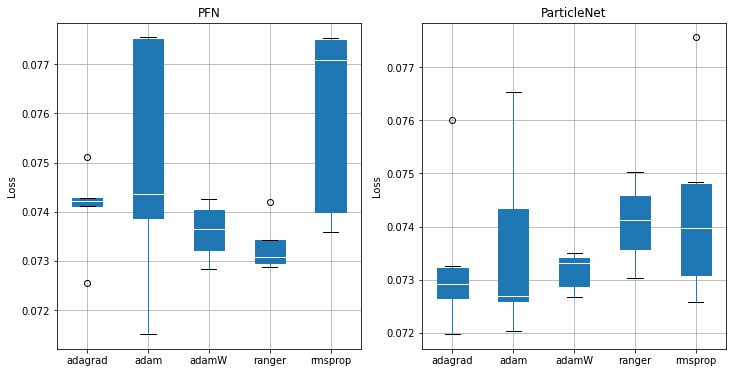

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
pfn_df.pivot(columns='Optimizer', values='Loss').boxplot(
    ax=ax1,
    patch_artist=True,
    medianprops={'color': 'white'},
)
particlenet_df.pivot(columns='Optimizer', values='Loss').boxplot(
    ax=ax2,
    patch_artist=True,
    medianprops={'color': 'white'},
)

ax1.set_title('PFN')
ax1.set_ylabel('Loss')
ax2.set_title('ParticleNet')
ax2.set_ylabel('Loss')

plt.show()

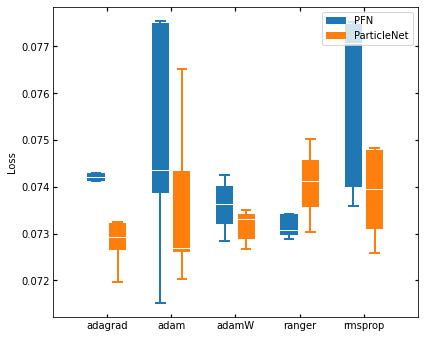

In [56]:
fig, ax = plt.subplots(figsize=(6, 4.8))

pfn_pivoted = pfn_df.pivot(columns='Optimizer', values='Loss')
pfn_data = [pfn_pivoted[col].dropna().values for col in pfn_pivoted.columns]

particlenet_pivoted = particlenet_df.pivot(columns='Optimizer', values='Loss')
particlenet_data = [particlenet_pivoted[col].dropna().values for col in particlenet_pivoted.columns]

labels = ['adagrad', 'adam', 'adamW', 'ranger', 'rmsprop']

c1 = 'tab:blue'
c2 = 'tab:orange'

bp1 = ax.boxplot(
    pfn_data, sym='', positions=np.linspace(1, 13, 5), widths=0.8*np.ones(5), labels=labels, 
    patch_artist=True, medianprops={'color': 'white'},
    boxprops=dict(linewidth=0, facecolor=c1),
    whiskerprops=dict(linewidth=2, color=c1),
    capprops=dict(linewidth=2, color=c1)
)
bp2 = ax.boxplot(
    particlenet_data, sym='', positions=np.linspace(2, 14, 5), widths=0.8*np.ones(5), labels=labels, 
    patch_artist=True, medianprops={'color': 'white'},
    boxprops=dict(linewidth=0, facecolor=c2),
    whiskerprops=dict(linewidth=2, color=c2),
    capprops=dict(linewidth=2, color=c2)
)

ax.legend([bp1['boxes'][0], bp2['boxes'][0]], ['PFN', 'ParticleNet'], loc='upper right')

ax.set_xticks(np.linspace(1.5, 13.5, 5), labels)
ax.tick_params(
    axis='both', direction='in', width=1.2,
    bottom=True, top=True, left=True, right=True
)
ax.set_xlim([-1, 16])
ax.set_ylabel('Loss')
plt.tight_layout()
plt.show()

## Scatterplots

In [38]:
def plot_scatterplots(df):
    cols = iter(df.columns[7:])
    plot_two = True

    for x in cols:
        try:
            col1, col2 = x, next(cols)
        except:
            plot_two = False

        if plot_two:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.2, 4.6))
            df.plot.scatter(x=col1, y='Loss', ax=ax1)
            df.plot.scatter(x=col2, y='Loss', ax=ax2)
        else:
            df.plot.scatter(x=x, y='Loss')

        plt.show()

### PFN

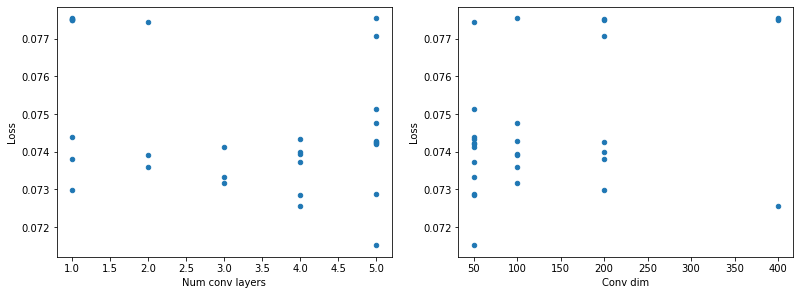

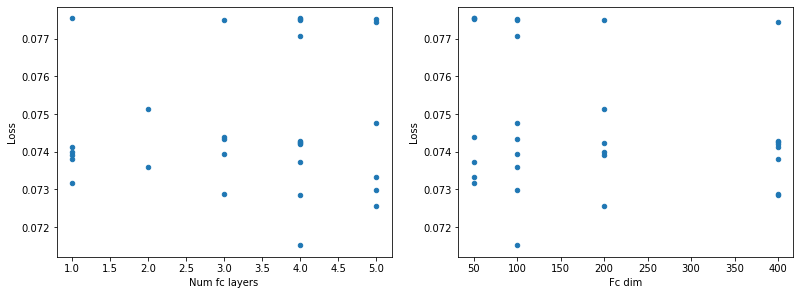

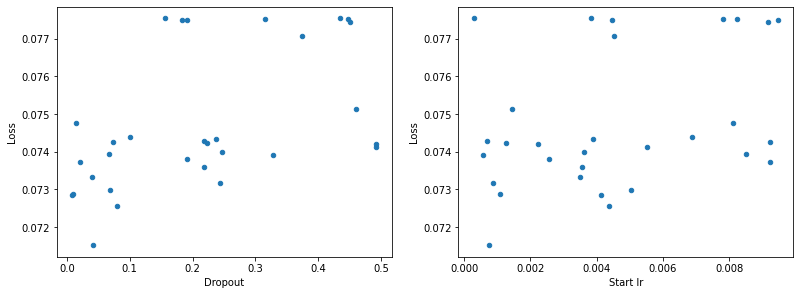

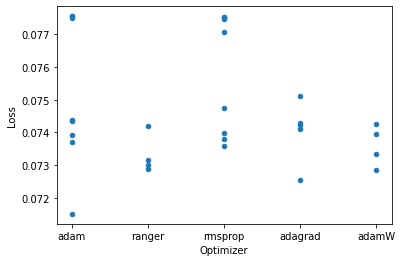

In [39]:
plot_scatterplots(pfn_df)

### ParticleNet

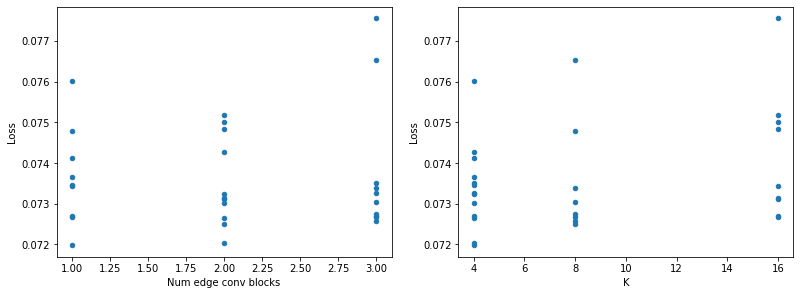

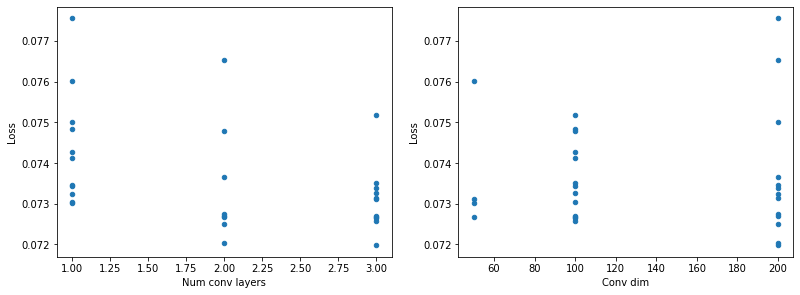

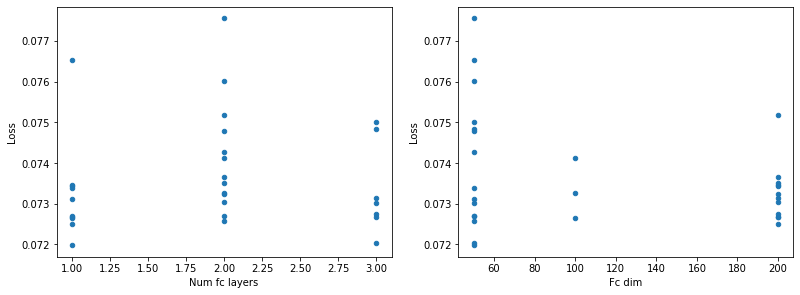

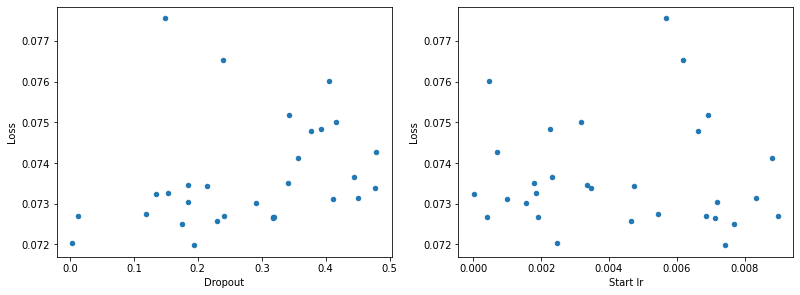

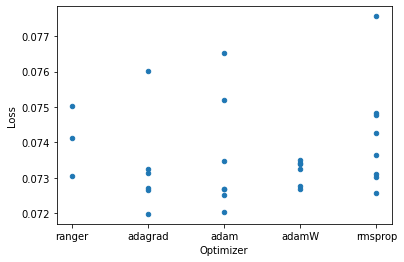

In [40]:
plot_scatterplots(particlenet_df)